In [2]:
from experiments.building_on_mit.emb_space.emb_space import run_tsi_experiment, display_embeddings
import torch
from ts_vae.data_processors.grambow_processor import ReactionDataset
from torch_geometric.data import DataLoader
from torch_geometric.utils import to_dense_batch
import numpy as np
from ts_vae.gaes.nec_gae import NodeEdgeCoord_AE
import matplotlib.pyplot as plt

# if want to run name == main in notebook, cell with just following line
# %run -i experiments/building_on_mit/emb_space

In [3]:
exp_log = run_tsi_experiment(train_ratio = 0.8, batch_size = 20, epochs = 10)

Preparing data...
Data prepared.

Preparing models...
Models prepared.

Starting TS interpolation experiment...

===== Training epoch 005 complete with loss: 4.2328 ====
===== Training epoch 009 complete with loss: 3.7326 ====

Completed experiment, use the experiment log to print results...


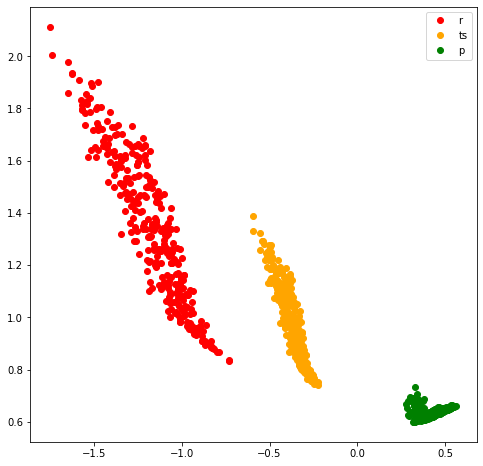

In [4]:
fig = display_embeddings(exp_log)
file_name = f"tr{0}_bs{0}_e{10}"
plt.savefig(f'experiments/building_on_mit/emb_space/figs/{file_name}.png')

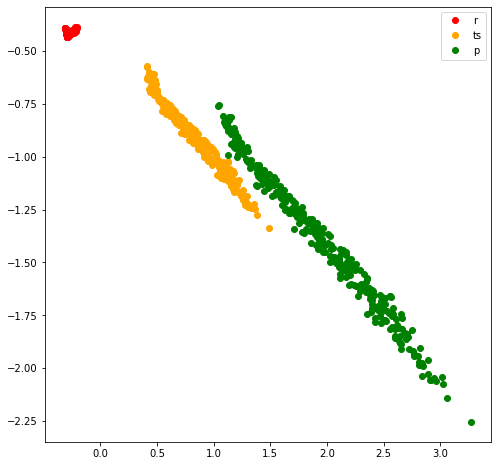

In [4]:
exp_params = [(0.8, 10, 20), (0.7, 10, 20), (0.6, 10, 20),
              (0.8, 10, 20), (0.8, 20, 20), (0.8, 30, 20),
              (0.8, 10, 20), (0.8, 10, 10), (0.8, 10, 30)]

for i, (t_ratio, b_size, epochs) in enumerate(exp_params):
    exp_log = run_tsi_experiment(t_ratio, b_size, epochs)
    fig = display_embeddings(exp_log)
    file_name = f"tr{t_ratio}_bs{b_size}_e{epochs}"
    plt.savefig(f'experiments/building_on_mit/emb_space_figs/emb_space_{i}.png')



### Results

Embeddings:
- Each time I run the experiment and display the scatter plot it is different for TS embeddings.
- On R and P embeddings?

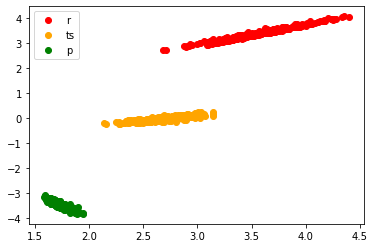

In [3]:
import matplotlib.pyplot as plt

final_embs_batched = exp_log.embeddings[-1]
final_embs = [] # i.e. unbatched
for (node_emb, ts_graph_emb, batch, r_graph_emb, p_graph_emb) in final_embs_batched:
    ts_node_emb_batch = to_dense_batch(node_emb, batch.x_ts_batch)[0] # just append tensors, not true/false values
    for mol_id, ts_node_emb in enumerate(ts_node_emb_batch):
        final_embs.append((ts_node_emb, ts_graph_emb[mol_id], r_graph_emb[mol_id], p_graph_emb[mol_id]))

ts_graph_embs = [ts_graph_emb.detach().numpy() for (_, ts_graph_emb, _, _) in final_embs]
r_graph_embs = [r_graph_emb.detach().numpy() for (_, _, r_graph_emb, _) in final_embs]
p_graph_embs = [p_graph_emb.detach().numpy() for (_, _, _, p_graph_emb) in final_embs]

cols = {'r': 'red', 'ts': 'orange', 'p': 'green'}

plt.scatter(*zip(*r_graph_embs), color = cols['r'])
plt.scatter(*zip(*ts_graph_embs), color = cols['ts'])
plt.scatter(*zip(*p_graph_embs), color = cols['p'])
# plt.legend(handles= cols)

markers = [plt.Line2D([0,0], [0,0], color = color, marker = 'o', linestyle = '') for color in  cols.values()]
plt.legend(markers, cols.keys())

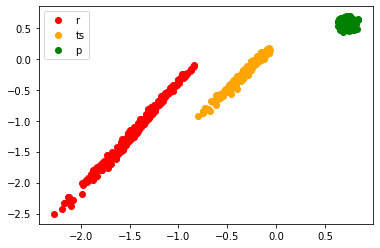

In [28]:
import matplotlib.pyplot as plt

final_embs_batched = exp_log.embeddings[-1]
final_embs = [] # i.e. unbatched
for (node_emb, ts_graph_emb, batch, r_graph_emb, p_graph_emb) in final_embs_batched:
    ts_node_emb_batch = to_dense_batch(node_emb, batch.x_ts_batch)[0] # just append tensors, not true/false values
    for mol_id, ts_node_emb in enumerate(ts_node_emb_batch):
        final_embs.append((ts_node_emb, ts_graph_emb[mol_id], r_graph_emb[mol_id], p_graph_emb[mol_id]))

ts_graph_embs = [ts_graph_emb.detach().numpy() for (_, ts_graph_emb, _, _) in final_embs]
r_graph_embs = [r_graph_emb.detach().numpy() for (_, _, r_graph_emb, _) in final_embs]
p_graph_embs = [p_graph_emb.detach().numpy() for (_, _, _, p_graph_emb) in final_embs]

cols = {'r': 'red', 'ts': 'orange', 'p': 'green'}

plt.scatter(*zip(*r_graph_embs), color = cols['r'])
plt.scatter(*zip(*ts_graph_embs), color = cols['ts'])
plt.scatter(*zip(*p_graph_embs), color = cols['p'])
# plt.legend(handles= cols)

markers = [plt.Line2D([0,0], [0,0], color = color, marker = 'o', linestyle = '') for color in  cols.values()]
plt.legend(markers, cols.keys())